In [127]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [128]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in [0, 4]:
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

20

In [129]:
images = []
for sample_idx in samples_idx.flatten():
    images.append(mndata.train_images[sample_idx])

images = np.array(images, dtype='float')
images = images / 255
images.shape

(20, 784)

In [130]:
def simple_plot(T: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)


    plt.show()

In [131]:
from typing import Literal

def show_image(image: ndarray, cmap: Literal['bone', 'Greys'] = 'bone'):
    # figure(figsize=(15, 10))

    imshow(np.array(image),
        interpolation='none',
        aspect='equal',
        cmap=cmap,
        )

    axis("off")

    show()

In [132]:
def get_discount_matrix(size, rev = False, cor_supr_size=0):
    a = np.arange(size)
    if rev:
        a = np.abs(np.abs(a - a[np.newaxis].T) - np.max(a))
    else:
        a = np.abs(a - a[np.newaxis].T)
    np.fill_diagonal(a, 0)

    if cor_supr_size > 0:
        a[:cor_supr_size] = 0
        a[:, 0:cor_supr_size] = 0
        a[-cor_supr_size:] = 0
        a[:, -cor_supr_size:] = 0

    return a

# a = get_discount_matrix(10, rev=True, cor_supr_size=2)
# a = np.array(a, dtype='float')
# # a[:, 0:2] = 0
# print(a)
# show_image(a, cmap='Greys')

In [133]:
def show_images_table(images_2d: ndarray, img_side: int = 28, row_size=10):
    column_size = int(images.shape[0] / row_size)

    shaped_images = images_2d.reshape(column_size, row_size, img_side, img_side)
    shaped_images = shaped_images.swapaxes(1, 2).reshape(column_size*img_side, row_size*img_side)

    figure(figsize=(15, 10))

    imshow(shaped_images,
           interpolation='none',
           aspect='equal',
           cmap='bone',
           )
    
    axis("off")

# show_images_table(images_2d=images)
images.shape

(20, 784)

0.4546362202970189 -0.47869770838891057


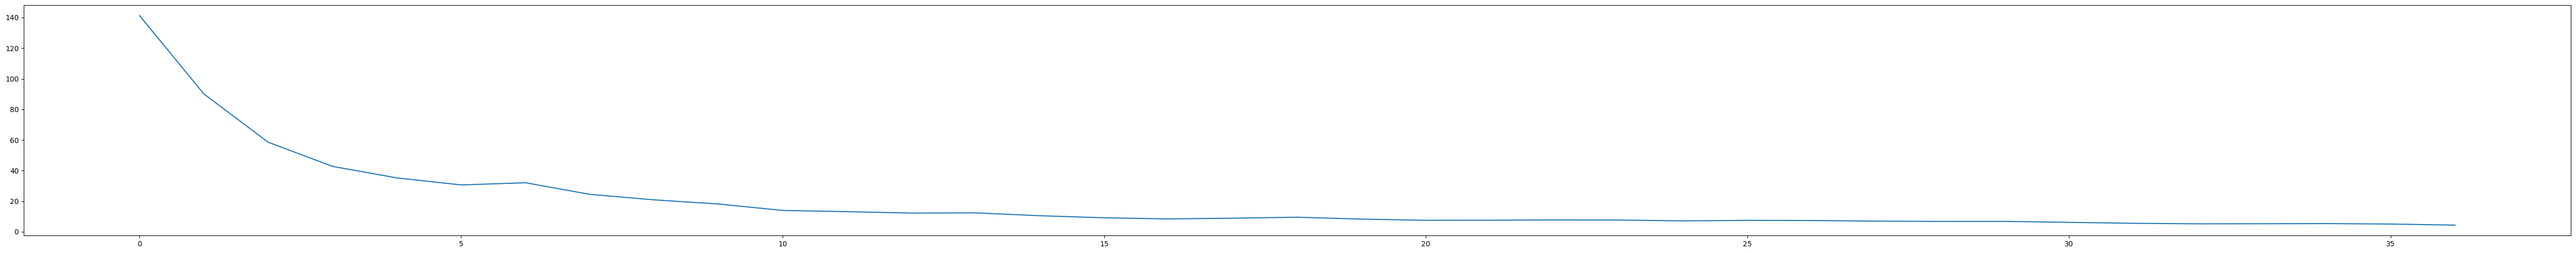

last_iter=37


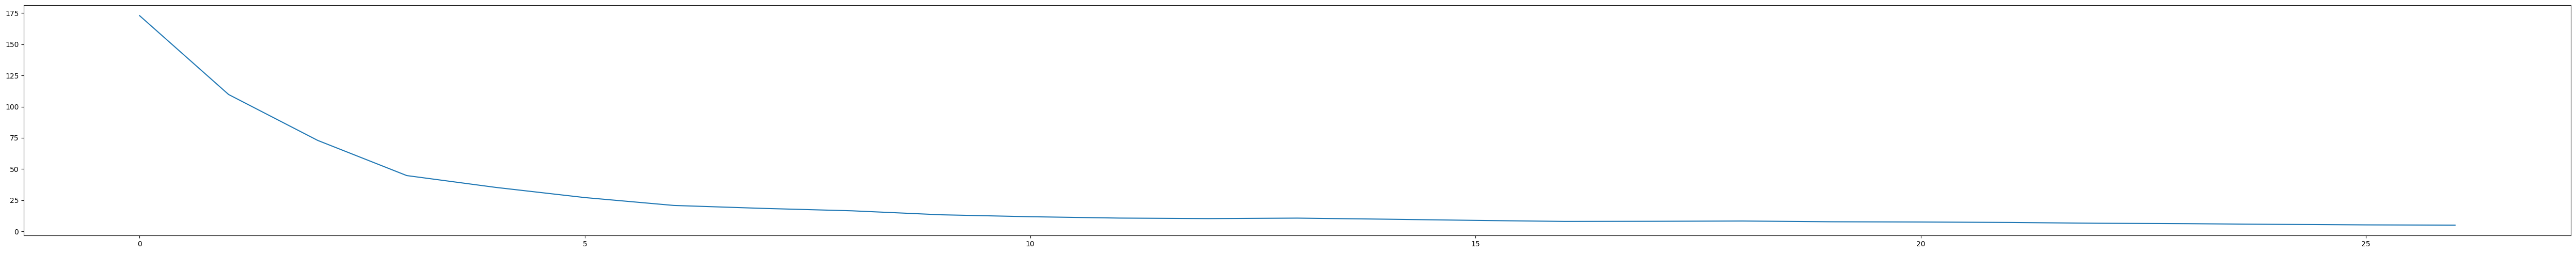

last_iter=27
22.486922467872077


In [210]:
I = np.zeros(n_mnist_pixels)
O = np.zeros(n_mnist_pixels)

# W = np.random.rand(O.size, I.size) - 0.5
W = np.random.normal(0, 0.1, (O.size, I.size))
print(W.max(), W.min())

train_images_idx = [10, 0]

img_out = []

for img_idx in train_images_idx:
    I = images[img_idx]

    O.fill(0)

    out = []

    last_iter = 0
    
    for iter_idx in range(100):
        # show_image(image=I.reshape(img_side, img_side))

        SO = I * W
        dO = np.sum(SO, axis=1)

        O += dO

        O *= (O > 0)

        O /= np.max(O)

        prev_diff = np.abs(I - O).sum()
        out.append(prev_diff)
        # out.append((O > 0).sum())

        # print(f'{prev_diff=}')
        
        last_iter += 1

        if prev_diff < 5:
            break

        # recur
        I = np.copy(O)
    
    img_out.append(np.copy(O))

    simple_plot(T=out)
    print(f'{last_iter=}')

diff = np.abs(img_out[0] - img_out[1]).sum()
print(diff)